In [113]:
import quippy
from quippy.potential import Potential
import ase.io
import numpy as np
import matplotlib.pyplot as plt

In [114]:
import sys
sys.path.append('../build')

import rascal
from rascal.representations import PairDistances
from rascal.models import Kernel

In [115]:
samples = ase.io.read('../reference_data/inputs/methane_dimer_sample.xyz', ':')
energies = np.array([cc.info["energy"] for cc in samples])

In [116]:
for dim in samples:
    cell_extents = (np.max(dim.get_positions(), axis=0)
                    - np.min(dim.get_positions(), axis=0)
                    + np.array([30, 30, 30]))
    dim.set_cell(cell_extents)
    dim.set_positions(dim.get_positions() + cell_extents / 2.)

In [117]:
pd = PairDistances(interaction_cutoff=12.0, cutoff_smooth_width=0.5, n_species=2)
rep = pd.transform(samples)
X = rep.get_features(pd)

In [118]:
CC_dist = X.T[2][X.T[2] != 0][::2] 
CH_dist = X.T[1][X.T[1] != 0]
CH_dist.sort()
CH_dist = CH_dist[::2]
HH_dist = X.T[0][X.T[0] != 0]
HH_dist.sort()
HH_dist = HH_dist[::2]

In [119]:
from math import ceil
w = 0.5
CCn = ceil((CC_dist.max() - CC_dist.min())/w)
CHn = ceil((CH_dist.max() - CH_dist.min())/w)
HHn = ceil((HH_dist.max() - HH_dist.min())/w)

In [120]:
potential = Potential('IP GAP', param_filename='gp-merig-cc-2b.xml')
energies_gap = []

for image in samples:
    image.set_calculator(potential)
    energies_gap.append(image.get_potential_energy())

In [121]:
CC_distances = [sample.get_distance(0,5) for sample in samples] 

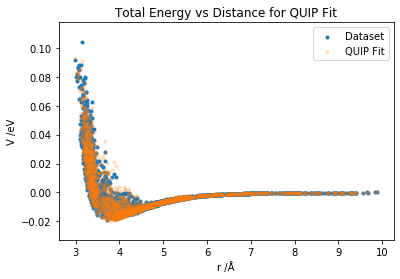

In [122]:
plt.scatter(CC_distances, energies, marker=".", label="Dataset")
plt.scatter(CC_distances, energies_gap4, marker=".", label="QUIP Fit", alpha=0.2)
plt.title("Total Energy vs Distance for QUIP Fit")
plt.xlabel("r /Å")
plt.ylabel("V /eV")
plt.legend()
plt.show()

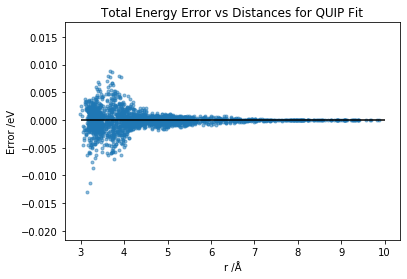

In [123]:
plt.scatter(CC_distances, energies_gap4-energies, marker=".", alpha=0.5)
plt.hlines(0, 3,10)
plt.xlabel("r /Å")
plt.ylabel("Error /eV")
plt.title("Total Energy Error vs Distances for QUIP Fit")
plt.show()

In [124]:
np.sqrt(np.mean((energies_gap4-energies)**2))/2

0.0008162139782347607

In [125]:
from ase import Atoms
pos_base = np.block([np.array([-0.5, 0.5])[:, np.newaxis], np.zeros((2, 2))])

def make_pairpot_dimers(rs, Z1, Z2):
    dimers = []
    cell = np.ones((3,)) * 30
    for r in rs:
        dimers.append(Atoms(numbers=(Z1, Z2), positions=((pos_base * r)), cell=cell))
    return dimers

rs_CC = np.linspace(0.5, 10, 2418)
dimers_CC = make_pairpot_dimers(rs_CC, 6, 6)  # C-C

In [126]:
rs_CH = np.linspace(0.5, 10, 2418)

In [127]:
rs_HH = np.linspace(0.5, 10, 2418)

In [128]:
potential4 = Potential('IP GAP', param_filename='gp-merig-cc-2b-4.xml')
energies_gap4 = []

for image in samples:
    image.set_calculator(potential4)
    energies_gap4.append(image.get_potential_energy())

In [129]:
CC_pair_potential4=[]
for dimer in dimers_CC:
    dimer.set_calculator(potential4)
    CC_pair_potential4.append(dimer.get_potential_energy())

In [130]:
bestCC = np.load("best_CC_pair_potential.npy")

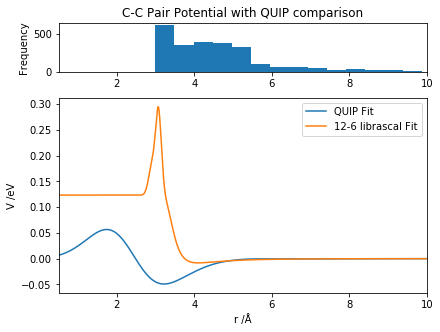

In [138]:
fig = plt.figure(figsize=(6,4.5), constrained_layout=True)

heights = [1, 4]
spec = fig.add_gridspec(ncols=1, nrows=2, height_ratios=heights)

axs=[]
axs0 = fig.add_subplot(spec[0,0])
axs1 = fig.add_subplot(spec[1,0])
axs.append(axs0)
axs.append(axs1)

axs[0].hist(CC_dist, bins = CCn)
axs[0].set_ylabel("Frequency")
axs[0].set_xlim(0.5,10)
axs[0].set_title("C-C Pair Potential with QUIP comparison")

axs[1].plot(rs_CC, CC_pair_potential4, label="QUIP Fit")
axs[1].plot(rs_CC, bestCC-bestCC[-1], label="12-6 librascal Fit")
axs[1].set_ylabel("V /eV")
axs[1].set_xlim(0.5,10)

plt.xlabel("r /Å")
plt.legend()
plt.show()

In [132]:
CH_pair_potential4=[]
for dimer in dimers_CH:
    dimer.set_calculator(potential4)
    CH_pair_potential4.append(dimer.get_potential_energy())

In [133]:
bestCH = np.load("best_CH_pair_potential.npy")

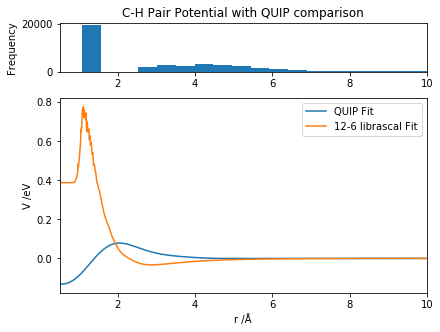

In [139]:
fig = plt.figure(figsize=(6,4.5), constrained_layout=True)

heights = [1, 4]
spec = fig.add_gridspec(ncols=1, nrows=2, height_ratios=heights)

axs=[]
axs0 = fig.add_subplot(spec[0,0])
axs1 = fig.add_subplot(spec[1,0])
axs.append(axs0)
axs.append(axs1)

axs[0].hist(CH_dist, bins = CHn)
axs[0].set_ylabel("Frequency")
axs[0].set_xlim(0.5,10)
axs[0].set_title("C-H Pair Potential with QUIP comparison")

axs[1].plot(rs_CH, CH_pair_potential4, label="QUIP Fit")
axs[1].plot(rs_CH, bestCH-bestCH[-1], label="12-6 librascal Fit")
axs[1].set_ylabel("V /eV")
axs[1].set_xlim(0.5,10)

plt.xlabel("r /Å")
plt.legend()
plt.show()

In [135]:
HH_pair_potential4=[]
for dimer in dimers_HH:
    dimer.set_calculator(potential4)
    HH_pair_potential4.append(dimer.get_potential_energy())

In [136]:
bestHH = np.load("best_HH_pair_potential.npy")

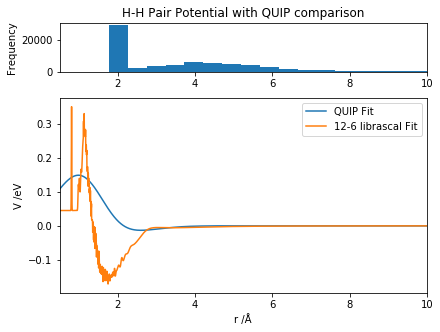

In [140]:
fig = plt.figure(figsize=(6,4.5), constrained_layout=True)

heights = [1, 4]
spec = fig.add_gridspec(ncols=1, nrows=2, height_ratios=heights)

axs=[]
axs0 = fig.add_subplot(spec[0,0])
axs1 = fig.add_subplot(spec[1,0])
axs.append(axs0)
axs.append(axs1)

axs[0].hist(HH_dist, bins = HHn)
axs[0].set_ylabel("Frequency")
axs[0].set_xlim(0.5,10)
axs[0].set_title("H-H Pair Potential with QUIP comparison")

axs[1].plot(rs_HH, HH_pair_potential4, label="QUIP Fit")
axs[1].plot(rs_HH, bestHH-bestHH[-1], label="12-6 librascal Fit")
axs[1].set_ylabel("V /eV")
axs[1].set_xlim(0.5,10)

plt.xlabel("r /Å")
plt.legend()
plt.show()